In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

In [2]:
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [3]:
df= pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = data.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [4]:
df['target'].value_counts()


target
1    357
0    212
Name: count, dtype: int64

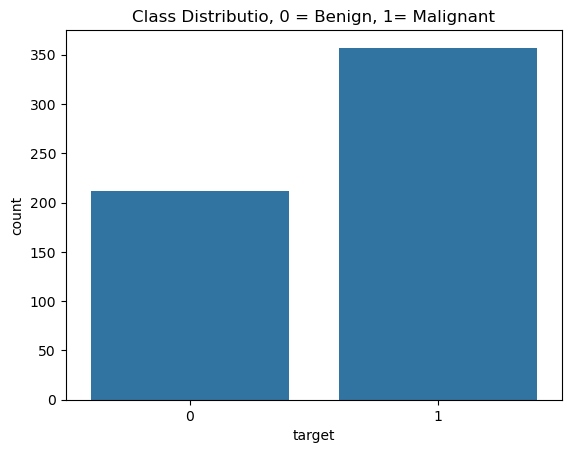

In [5]:
sns.countplot(x = 'target', data= df)
plt.title('Class Distributio, 0 = Benign, 1= Malignant')
plt.show()

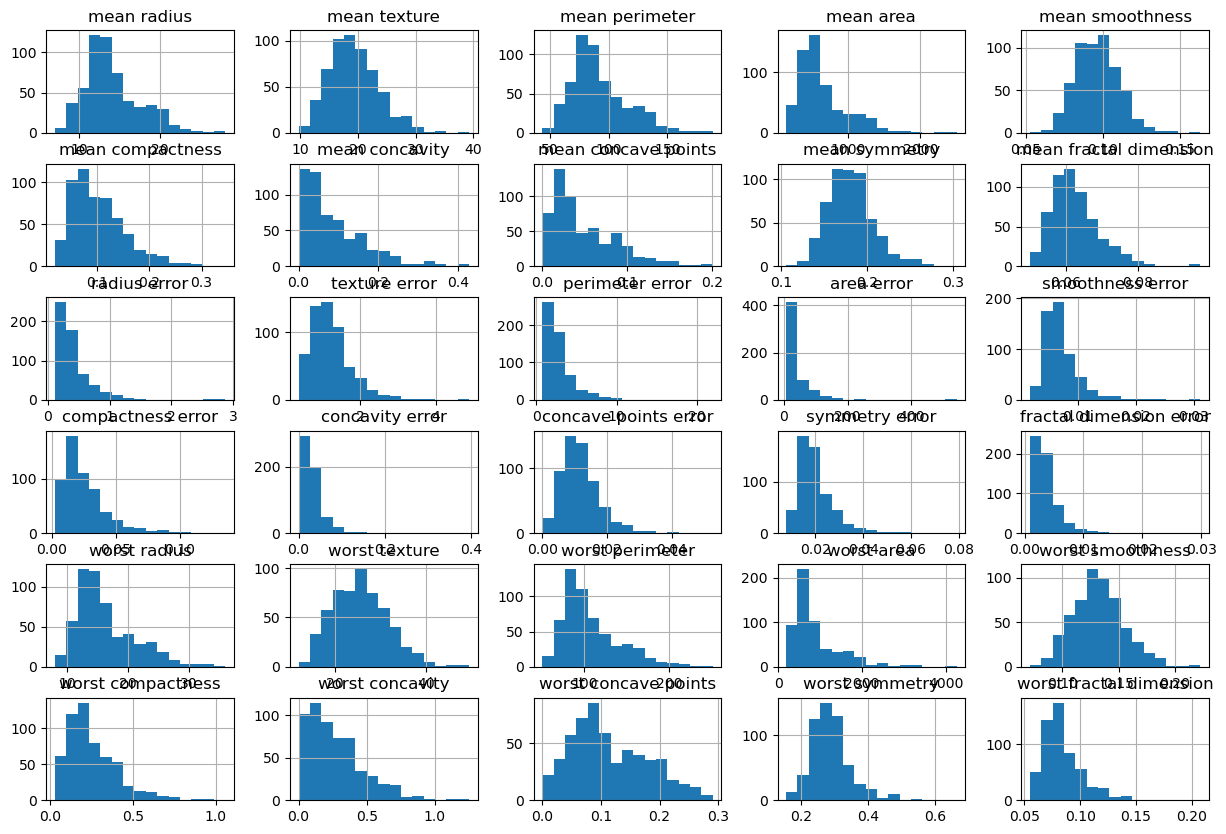

In [6]:
df[data.feature_names].hist(bins = 15, figsize= (15,10))
plt.show()

In [7]:
X = df[data.feature_names]
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [8]:
y = df['target']
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int32

In [9]:
X_train, X_test, y_train, y_test =  train_test_split(X, y,test_size = 0.3, random_state = 42)
model = LogisticRegression(max_iter = 10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [10]:
model.intercept_

array([31.24175356])

In [11]:
model.coef_

array([[ 1.05877334e+00,  2.31249511e-01, -3.89683122e-01,
         2.59850416e-02, -1.37168646e-01, -2.37919082e-01,
        -5.15075104e-01, -2.75774590e-01, -2.19242233e-01,
        -3.83444213e-02, -1.19248528e-01,  1.36084283e+00,
         4.48654248e-01, -1.45065304e-01, -1.83663903e-02,
         7.30650241e-03, -6.63562519e-02, -3.51897062e-02,
        -4.42375506e-02,  7.41448608e-04,  5.07113219e-02,
        -5.05500242e-01, -5.96892853e-02, -1.11127574e-02,
        -2.75607510e-01, -7.18290527e-01, -1.34286087e+00,
        -4.97501017e-01, -7.13975133e-01, -9.96418226e-02]])

In [12]:
y_pred = model.predict(X_test)

In [13]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9766081871345029

In [14]:
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=data.target_names))

Classification Report:
               precision    recall  f1-score   support

   malignant       0.97      0.97      0.97        63
      benign       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [15]:
print("Confusion MAtrix:\n", confusion_matrix(y_test, y_pred))

Confusion MAtrix:
 [[ 61   2]
 [  2 106]]


In [16]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100] # Regularization strength
             , 'penalty': ['l2'], # L 2 regularization
             'solver' : ['lbfgs'],
             'class_weight': [None, 'balanced']} # handle imbalance
# Regularization strength

In [17]:
log_reg = model

In [18]:
grid_search = GridSearchCV(estimator = log_reg,
                          param_grid= param_grid,
                          cv = 5,
                          scoring = 'recall')

In [19]:
grid_search.fit(X_train, y_train)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'], 'penalty': ['l2'],
                         'solver': ['lbfgs']},
             scoring='recall')

In [20]:
best_model = grid_search.best_estimator_

In [21]:
print('Best hyperparameters:', grid_search.best_params_)

Best hyperparameters: {'C': 100, 'class_weight': None, 'penalty': 'l2', 'solver': 'lbfgs'}


In [22]:
y_probs= best_model.predict_proba(X_test)[:, 1]
y_probs

array([7.74310455e-01, 3.61964918e-09, 1.22770904e-04, 9.99956405e-01,
       9.99991175e-01, 4.98958627e-13, 6.14428456e-14, 7.66638890e-03,
       9.20844858e-01, 9.99643061e-01, 9.54524867e-01, 1.83407906e-04,
       9.98340678e-01, 3.36303100e-03, 9.99517776e-01, 1.62608724e-03,
       9.99747655e-01, 9.99999813e-01, 9.99999890e-01, 1.02238447e-09,
       9.42141461e-01, 9.98231905e-01, 8.73396694e-12, 9.99949595e-01,
       9.99536765e-01, 9.99887789e-01, 9.99787594e-01, 9.99691032e-01,
       9.99037996e-01, 1.92026751e-09, 9.99385718e-01, 9.99958259e-01,
       9.99327177e-01, 9.97241550e-01, 9.99965167e-01, 9.98923977e-01,
       2.78912636e-03, 9.99339076e-01, 2.40340759e-06, 7.97469907e-01,
       9.99965575e-01, 1.57461270e-05, 9.99396642e-01, 9.98815367e-01,
       9.99876933e-01, 9.55415379e-01, 9.99966597e-01, 9.99984841e-01,
       9.47117407e-01, 9.99813768e-01, 1.01307261e-05, 3.76660876e-12,
       8.33155660e-01, 9.99982131e-01, 9.99906397e-01, 9.94018298e-01,
      

In [23]:
# loop through thresholds to find the one with 0 type 1 errors
for t in np.arange(0.5, 0.9, 0.05):
    y_pred_custom = (y_probs >= t).astype(int)
    cm = confusion_matrix(y_test, y_pred_custom)
    false_positive = cm[0][1]
    false_negative = cm[1][0]
    print(f"\nThreshold: {t:.2f}")
    print("Confusion Matrix:")
    print(cm)
    print("Type I Errors (False Positives):", false_positive)
    print("Type II Errors (False Negatives):", false_negative)
    if false_positive == 0:
        print("Found threshold with 0 Type I errors!")
        break


Threshold: 0.50
Confusion Matrix:
[[ 61   2]
 [  3 105]]
Type I Errors (False Positives): 2
Type II Errors (False Negatives): 3

Threshold: 0.55
Confusion Matrix:
[[ 61   2]
 [  3 105]]
Type I Errors (False Positives): 2
Type II Errors (False Negatives): 3

Threshold: 0.60
Confusion Matrix:
[[ 61   2]
 [  3 105]]
Type I Errors (False Positives): 2
Type II Errors (False Negatives): 3

Threshold: 0.65
Confusion Matrix:
[[ 62   1]
 [  3 105]]
Type I Errors (False Positives): 1
Type II Errors (False Negatives): 3

Threshold: 0.70
Confusion Matrix:
[[ 62   1]
 [  4 104]]
Type I Errors (False Positives): 1
Type II Errors (False Negatives): 4

Threshold: 0.75
Confusion Matrix:
[[ 62   1]
 [  5 103]]
Type I Errors (False Positives): 1
Type II Errors (False Negatives): 5

Threshold: 0.80
Confusion Matrix:
[[ 62   1]
 [  8 100]]
Type I Errors (False Positives): 1
Type II Errors (False Negatives): 8

Threshold: 0.85
Confusion Matrix:
[[62  1]
 [ 9 99]]
Type I Errors (False Positives): 1
Type II 

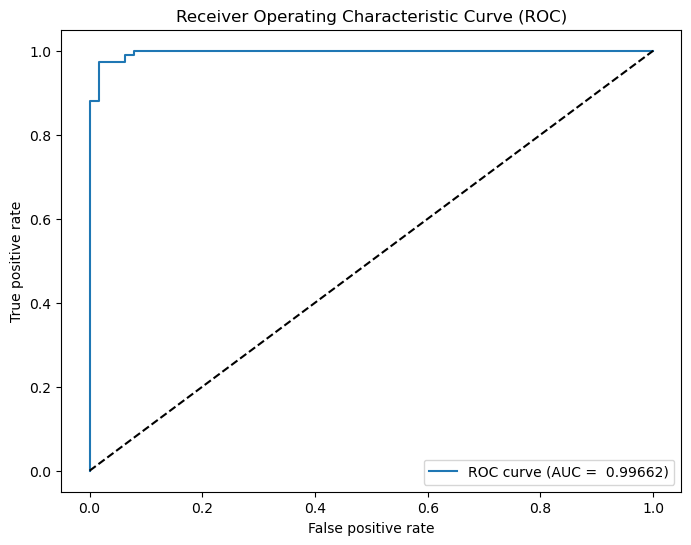

In [57]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
plt.figure(figsize = (8,6))
plt.plot(fpr, tpr, label = f'ROC curve (AUC = {roc_auc : .5f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characteristic Curve (ROC)')
plt.legend()
plt.show()

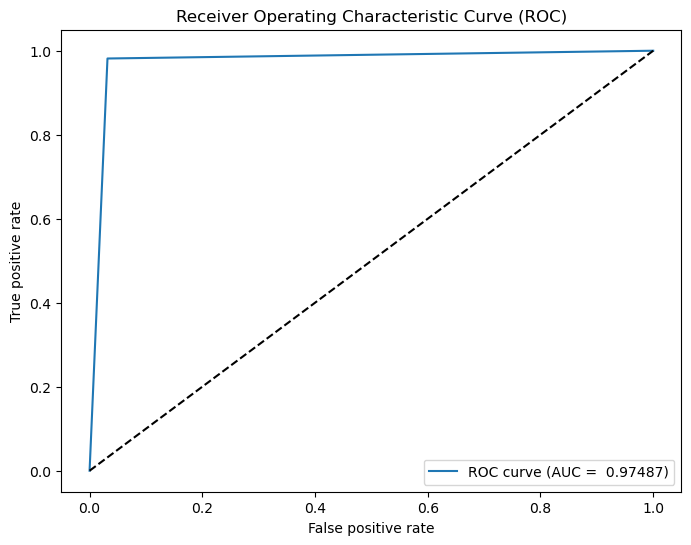

In [59]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize = (8,6))
plt.plot(fpr, tpr, label = f'ROC curve (AUC = {roc_auc : .5f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characteristic Curve (ROC)')
plt.legend()
plt.show()